In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [403]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [404]:
data.drop(columns=['Name','Ticket','Cabin','PassengerId'],inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [406]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [427]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [428]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [429]:
df=pd.get_dummies(data,drop_first=True)
# df.drop(columns='Sex_female',inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [430]:
from sklearn.preprocessing import StandardScaler

In [431]:
scalar=StandardScaler()
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [432]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [433]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [434]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,29.642093,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [435]:
columns=["Pclass","Age","SibSp","Parch","Fare"]
X_Norm=X
X_Norm[columns]=scalar.fit_transform(X[columns])

In [436]:
X_Norm.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [437]:
X_Norm

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.825209,-5.896199e-01,0.431350,-0.474326,-0.500240,True,False,True
1,-1.572211,6.448480e-01,0.431350,-0.474326,0.788947,False,False,False
2,0.825209,-2.810029e-01,-0.475199,-0.474326,-0.486650,False,False,True
3,-1.572211,4.133853e-01,0.431350,-0.474326,0.422861,False,False,True
4,0.825209,4.133853e-01,-0.475199,-0.474326,-0.484133,True,False,True
...,...,...,...,...,...,...,...,...
886,-0.373501,-2.038487e-01,-0.475199,-0.474326,-0.384475,True,False,True
887,-1.572211,-8.210826e-01,-0.475199,-0.474326,-0.042213,False,False,True
888,0.825209,-5.482138e-16,0.431350,2.006119,-0.174084,False,False,True
889,-1.572211,-2.810029e-01,-0.475199,-0.474326,-0.042213,True,False,False


In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [439]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=100)

In [440]:
model=LogisticRegression()

In [441]:
model.fit(x_train,y_train)

LogisticRegression()

In [442]:
y_pred=model.predict(x_test)

In [443]:
from sklearn.metrics import mean_squared_error,confusion_matrix
import seaborn as sns
mean_squared_error(y_pred=y_pred,y_true=y_test)

0.1797752808988764

In [444]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0], dtype=int64)

<Axes: >

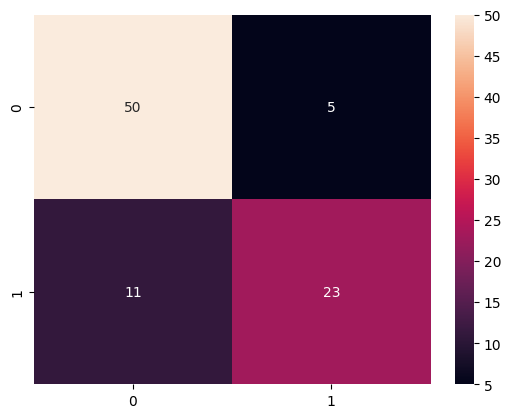

In [445]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [446]:
import pickle
with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)